In [807]:
# Classifying the data uing heirarchial clustering
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import csv
from pipeline.pipline import *
data = Read_csv('glen','./iPhone/glen_0003.csv')
data = Clean_iPhone_Data(data)
data = data.loc[(data['data_name'] != 'Horizontal Accuracy') & \
                (data['data_name'] != 'Vertical Accuracy')   & \
                (data['sensor']    != 'Proximity')           & \
                (data['sensor']    != 'Magnetometer (raw)')  & \
                (data['sensor']    != 'Bluetooth')           & \
                (data['sensor']    != 'Cell Radio')          & \
                (data['sensor']    != 'Device Orientation')  & \
                (data['sensor']    != 'Device')              & \
                (data['sensor']    != 'Battery')             & \
                (data['sensor']    != 'Memory')              & \
                (data['sensor']    != 'Storage')
               ]

Skipping line 180: expected 5 fields, saw 6
Skipping line 181: expected 5 fields, saw 6
Skipping line 230: expected 5 fields, saw 6
Skipping line 238: expected 5 fields, saw 6
Skipping line 248: expected 5 fields, saw 6
Skipping line 256: expected 5 fields, saw 6
Skipping line 321: expected 5 fields, saw 6
Skipping line 322: expected 5 fields, saw 6
Skipping line 372: expected 5 fields, saw 6
Skipping line 373: expected 5 fields, saw 6
Skipping line 447: expected 5 fields, saw 6
Skipping line 455: expected 5 fields, saw 6
Skipping line 463: expected 5 fields, saw 6
Skipping line 471: expected 5 fields, saw 6
Skipping line 479: expected 5 fields, saw 6
Skipping line 487: expected 5 fields, saw 6
Skipping line 507: expected 5 fields, saw 6
Skipping line 508: expected 5 fields, saw 6
Skipping line 563: expected 5 fields, saw 6
Skipping line 571: expected 5 fields, saw 6
Skipping line 579: expected 5 fields, saw 6
Skipping line 633: expected 5 fields, saw 6
Skipping line 634: expected 5 fi

In [798]:
def long_to_wide_GPS_iPhone(df):
    df_temp = df.reset_index()
    # subset the data to GPS only
    df_GPS = df_temp.loc[df_temp.sensor == 'GPS']
    # combine the data_name and sensor columns
    df_GPS['data_name'] = df_GPS[['sensor', 'data_name']].apply(lambda x: '-'.join(x), axis=1)
    df_GPS = df_GPS[['index','data_name','data_raw']]
    # for some reason we still have duplicates, drop these
    df_GPS.drop_duplicates(subset=['data_name','index'],keep='first',inplace=True)   
    # divide into Lat/Long and Altitude 
    df_GPS_LatLong = df_GPS.loc[df_GPS.data_name != 'Altitude']
    df_GPS_Alt = df_GPS.loc[df_GPS.data_name == 'Altitude']
    # pivot to wide format and rest the index
    df_GPS_LatLong = df_GPS_LatLong.pivot(index="index",columns='data_name', values='data_raw')
    df_GPS_Alt = df_GPS_Alt.pivot(index="index",columns='data_name', values='data_raw')
    # reset the index for joining
    df_GPS_LatLong.reset_index(inplace=True)
    df_GPS_Alt.reset_index(inplace=True)
    # merge the data into one df and return
    df_temp = pd.merge(df_GPS_LatLong, df_GPS_Alt, how='left', on='index')
    # make index back into the index
    df_temp = df_temp.set_index('index', drop=True, verify_integrity=True)
    df_temp = df_temp.rename_axis(None)
#    df_temp = df_temp.index.rename('DateStamp')
    return(df_temp)

In [774]:
def long_to_wide_Wifi_Only_iPhone(df):
    df_temp = df.reset_index()
    # subset the data to GPS only
    df_WiFi = df_temp.loc[df_temp.sensor == 'WiFi']
    # combine the data_name and sensor columns
    df_WiFi['data_name'] = df_WiFi[['sensor', 'data_name']].apply(lambda x: '-'.join(x), axis=1)
    df_WiFi = df_WiFi[['index','data_name','data_raw']]
    # for some reason we still have duplicates, drop these
    df_WiFi.drop_duplicates(subset=['data_name','index'],keep='first',inplace=True)   
    # pivot to wide format and rest the index
    df_WiFi = df_WiFi.pivot(index="index",columns='data_name', values='data_raw')
    return(df_WiFi)

In [799]:
# Still working on this function
def long_to_wide_NonPosition_iPhone(df):
    df_temp1 = df.reset_index()
    # subset the data to GPS only
    df_notGPS = df_temp1.loc[df_temp1.sensor != 'GPS']
    # combine the data_name and sensor columns
    df_notGPS['data_name'] = df_notGPS[['sensor', 'data_name']].apply(lambda x: '-'.join(x), axis=1)
    df_notGPS = df_notGPS[['index','data_name','data_raw']]
    df_notGPS.drop_duplicates(subset=['data_name','index'],keep='first',inplace=True)   
    # divide into parts
#    df_notGPS_ACC = df_GPS.loc[df_GPS.data_name == 'Acceleration (total)']

#    df_notGPS_ACC_gav = df_GPS.loc[df_GPS.data_name == 'Acceleration (total)']
#    df_notGPS_ACC_usr = df_GPS.loc[df_GPS.data_name == 'Acceleration (total)']
#    df_notGPS_ACC_tot = df_GPS.loc[df_GPS.data_name == 'Acceleration (total)']
#    
#    df_GPS_LatLong = df_GPS.loc[df_temp1.data_name != 'Altitude']
#    df_GPS_Alt['data_name'] = df_GPS_Alt[['sensor', 'data_name']].apply(lambda x: '-'.join(x), axis=1)
#    df_GPS_Alt = df_GPS_Alt[['index','data_name','data_raw']]
    # for some reason we still have duplicates, drop these
   
#    df_GPS_Alt.drop_duplicates(subset=['data_name','index'],keep='first',inplace=True)
    # pivot to wide format and rest the index
#    df_GPS_LatLong = df_GPS_LatLong.pivot(index="index",columns='data_name', values='data_raw')
#    df_GPS_LatLong.reset_index(inplace=True)
#    df_GPS_Alt = df_GPS_Alt.pivot(index="index",columns='data_name', values='data_raw')
#    df_GPS_Alt.reset_index(inplace=True)
    # merge the data into one df and return
#    df = pd.merge(df_GPS_LatLong, df_GPS_Alt, how='left', on='index')
    return(df_notGPS)

In [808]:
data_sub = data[['sensor','data_name','data_raw']]
#data_wifi = data[[]]
data_GPS = long_to_wide_GPS_iPhone(data_sub)
data_WIFI = long_to_wide_Wifi_Only_iPhone(data_sub)
# Add the wifi data to use as ground truth for this case
data_gps = data_GPS.reset_index()
data_wifi = data_WIFI.reset_index()
data_GPS_WiFi = pd.merge (data_gps, data_wifi, on='index', how='left')

/Users/gafergus/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [767]:
# This is code I'm not using but might in the future

#data.groupby(['data_name']).count()
#data_subset.count()

#data_notGPS = long_to_wide_NonPosition_iPhone(data_sub)
#data_notGPS.data_name.unique()
#data_notGPS = data_notGPS[['data_name','data_raw']]
#data_notGPS.groupby(['data_name']).count()
#data_notGPS.loc[data_notGPS['data_name'] == 'Altimeter (Barometer)-Pressure']
#data_notGPS.loc[data_notGPS['data_name'] == 'Acceleration (total)-x']

#data_LatLong = data_LatLong[['data_name','data_raw']]
#data_LatLong.groupby(['data_name','index']).count()
#with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
#    print data_notGPS

#data_new = pd.DataFrame(dict(map(lambda x:(x[0],list(x[1]['data_raw'])),data_subset)))
#dict(map(lambda x:(x[0],list(x[1]['data_raw'])),data_subset.groupby(['index'])))
#a = map(lambda x: len(x[1]['data_raw']),data_subset.groupby(['data_name','index']))
#data_subset.pivot(index="index",columns='data_name', values='data_raw')
#data_subset.groupby('data_name')
#a = data_subset.ix[1:300,:]
#a

In [809]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
data_scaled = preprocessing.scale(data_GPS)
h_clustering = AgglomerativeClustering()
h_clustering.set_params(n_clusters = 4)
h_clustering.fit(data_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=4,
            pooling_func=<function mean at 0x1051cb848>)

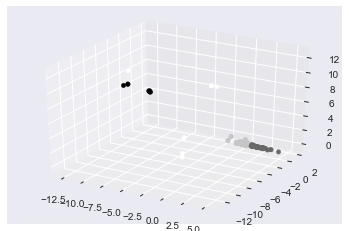

In [810]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c = h_clustering.labels_, alpha = 1.0)

In [818]:
data_GPS_added = data_GPS.assign(Cluster=pd.Series(h_clustering.labels_).values)
data_GPS_added
#pd.Series(h_clustering.labels_)
#labels

data_name,GPS-Altitude,GPS-Latitude,GPS-Longitude,Cluster
2017-03-10 08:10:44+00:00,6.59,40.7388,-73.8883,3
2017-03-10 08:10:45+00:00,6.59,40.7388,-73.8883,3
2017-03-10 08:10:46+00:00,6.01205,40.7385,-73.8893,3
2017-03-10 08:10:47+00:00,11.7499,40.7385,-73.8896,3
2017-03-10 08:10:48+00:00,11.6176,40.7384,-73.8897,3
2017-03-10 08:10:49+00:00,11.8199,40.7384,-73.8899,3
2017-03-10 08:15:12+00:00,12.0568,40.7383,-73.8901,3
2017-03-10 08:15:15+00:00,12.0568,40.7383,-73.8901,3
2017-03-10 08:15:17+00:00,-7.23914,40.7502,-73.9201,0
2017-03-10 08:15:18+00:00,13.2048,40.7501,-73.9202,0


data_name,GPS-Altitude,GPS-Latitude,GPS-Longitude,Cluster,Cluster2
2017-03-10 08:10:44+00:00,6.59,40.7388,-73.8883,3,1
2017-03-10 08:10:45+00:00,6.59,40.7388,-73.8883,3,1
2017-03-10 08:10:46+00:00,6.01205,40.7385,-73.8893,3,1
2017-03-10 08:10:47+00:00,11.7499,40.7385,-73.8896,3,1
2017-03-10 08:10:48+00:00,11.6176,40.7384,-73.8897,3,1
2017-03-10 08:10:49+00:00,11.8199,40.7384,-73.8899,3,1
2017-03-10 08:15:12+00:00,12.0568,40.7383,-73.8901,3,1
2017-03-10 08:15:15+00:00,12.0568,40.7383,-73.8901,3,1
2017-03-10 08:15:17+00:00,-7.23914,40.7502,-73.9201,0,2
2017-03-10 08:15:18+00:00,13.2048,40.7501,-73.9202,0,3


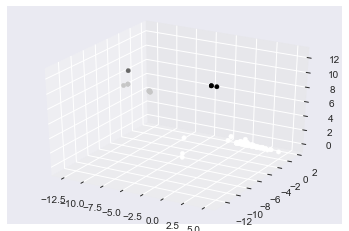

In [820]:
h2_clustering = AgglomerativeClustering()
h2_clustering.set_params(n_clusters = 4,\
                        affinity='euclidean',\
                        linkage='average')
h2_clustering.fit(data_scaled)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c = h2_clustering.labels_, alpha = 1.0)

data_GPS_added2 = data_GPS_added.assign(Cluster2=pd.Series(h2_clustering.labels_).values)
data_GPS_added2


data_name,GPS-Altitude,GPS-Latitude,GPS-Longitude,Cluster,Cluster2,Cluster3
2017-03-10 08:10:44+00:00,6.59,40.7388,-73.8883,3,1,1
2017-03-10 08:10:45+00:00,6.59,40.7388,-73.8883,3,1,1
2017-03-10 08:10:46+00:00,6.01205,40.7385,-73.8893,3,1,1
2017-03-10 08:10:47+00:00,11.7499,40.7385,-73.8896,3,1,1
2017-03-10 08:10:48+00:00,11.6176,40.7384,-73.8897,3,1,1
2017-03-10 08:10:49+00:00,11.8199,40.7384,-73.8899,3,1,1
2017-03-10 08:15:12+00:00,12.0568,40.7383,-73.8901,3,1,1
2017-03-10 08:15:15+00:00,12.0568,40.7383,-73.8901,3,1,1
2017-03-10 08:15:17+00:00,-7.23914,40.7502,-73.9201,0,2,0
2017-03-10 08:15:18+00:00,13.2048,40.7501,-73.9202,0,3,0


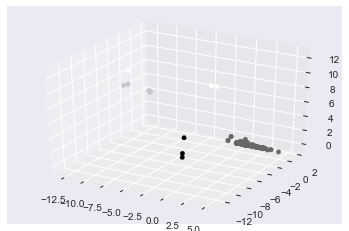

In [822]:
h3_clustering = AgglomerativeClustering()
h3_clustering.set_params(n_clusters = 4,\
                        affinity='manhattan',\
                        linkage='average')
h3_clustering.fit(data_scaled)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c = h3_clustering.labels_, alpha = 1.0)

data_GPS_added3 = data_GPS_added2.assign(Cluster3=pd.Series(h3_clustering.labels_).values)
data_GPS_added3

data_name,GPS-Altitude,GPS-Latitude,GPS-Longitude,Cluster,Cluster2,Cluster3
2017-03-10 08:10:44+00:00,6.59,40.7388,-73.8883,3,1,-1
2017-03-10 08:10:45+00:00,6.59,40.7388,-73.8883,3,1,-1
2017-03-10 08:10:46+00:00,6.01205,40.7385,-73.8893,3,1,-1
2017-03-10 08:10:47+00:00,11.7499,40.7385,-73.8896,3,1,0
2017-03-10 08:10:48+00:00,11.6176,40.7384,-73.8897,3,1,0
2017-03-10 08:10:49+00:00,11.8199,40.7384,-73.8899,3,1,0
2017-03-10 08:15:12+00:00,12.0568,40.7383,-73.8901,3,1,0
2017-03-10 08:15:15+00:00,12.0568,40.7383,-73.8901,3,1,0
2017-03-10 08:15:17+00:00,-7.23914,40.7502,-73.9201,0,2,-1
2017-03-10 08:15:18+00:00,13.2048,40.7501,-73.9202,0,3,-1


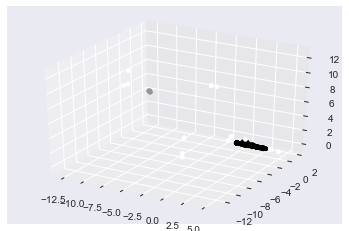

In [825]:
from sklearn.cluster import DBSCAN
h4_clustering = DBSCAN()
h4_clustering.set_params(eps=0.3)
h4_clustering.fit(data_scaled)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c = h4_clustering.labels_, alpha = 1.0)

data_GPS_added4 = data_GPS_added3.assign(Cluster3=pd.Series(h4_clustering.labels_).values)
data_GPS_added4